In [82]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils, common_utils
import defines
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_crfsuite.utils import flatten

In [4]:
dir_name="clean_chars"

# Check most common lemmas

In [15]:
imp.reload(common_utils)
sent_pos_db =  common_utils.concat_dbs(dir_name,"sent_pos_db",['LEMMA','sent_idx','POSTAG'],'db_idx')
sent_pos_db

doc_idx  db_idx   sent_idx LEMMA POSTAG
0             1       0   0.000000    אז     RB
1             1       1   0.000000  היום     RB
2             1       2   0.000000   הוא    PRP
3             1       3   0.000000  נפגש     BN
4             1       4   0.000000    פה     RB
...         ...     ...        ...   ...    ...
507725       80    5311 490.000000   היה    COP
507726       80    5312 490.000000     ל     IN
507727       80    5313 490.000000   אני  S_PRN
507728       80    5314 490.000000  מאוד     RB
507729       80    5315 490.000000   קשה     RB

[507730 rows x 5 columns]

In [13]:
sent_pos_db

doc_idx  sent_idx LEMMA
0             1         0    אז
1             1         1  היום
2             1         2   הוא
3             1         3  נפגש
4             1         4    פה
...         ...       ...   ...
548199       80      5321   היה
548200       80      5322     ל
548201       80      5323   אני
548202       80      5324  מאוד
548203       80      5325   קשה

[548204 rows x 3 columns]

In [16]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db",['text','is_nar','nar_idx','is_client'])

In [17]:
sent_label_db

doc_idx  sent_idx                                             text  \
0            1         0  אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי   
1            1         1                                               כן   
2            1         2                                  אוקיי  מה שלומך   
3            1         3                                         ברוך השם   
4            1         4                              מחר יש לכם יום טיול   
...        ...       ...                                              ...   
35088       80       486                            שאני מרגיש בהם לא נוח   
35089       80       487                      אז כאילו למה למה אני מתגעגע   
35090       80       488                          או למה אני למה אני רוצה   
35091       80       489                               והצלחת לענות לעצמך   
35092       80       490                                  היה לי מאוד קשה   

        is_nar  nar_idx  is_client  
0     0.000000 0.000000          0  
1     0.000000 0.000000          1  
2     0.000000 0.000000          0  
3     0.000000 0.000000          1  
4     0.000000 0.000000          0  
...        ...      ...        ...  
35088 0.000000 0.000000          1  
35089 0.000000 0.000000          1  
35090 0.000000 0.000000          1  
35091 0.000000 0.000000          0  
35092 0.000000 0.000000          1  

[35093 rows x 6 columns]

In [18]:
sent_lemma_db=pd.merge(sent_label_db,sent_pos_db,left_on=['doc_idx','sent_idx'],right_on=['doc_idx','sent_idx'],validate='one_to_many',how='outer')

In [19]:
sent_lemma_db

doc_idx  sent_idx                                             text  \
0             1         0  אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי   
1             1         0  אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי   
2             1         0  אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי   
3             1         0  אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי   
4             1         0  אז היום אנחנו נפגשים פה ב18 אבל שבוע הבא בחמישי   
...         ...       ...                                              ...   
507725       80       490                                  היה לי מאוד קשה   
507726       80       490                                  היה לי מאוד קשה   
507727       80       490                                  היה לי מאוד קשה   
507728       80       490                                  היה לי מאוד קשה   
507729       80       490                                  היה לי מאוד קשה   

         is_nar  nar_idx  is_client  db_idx LEMMA POSTAG  
0      0.000000 0.000000          0       0    אז     RB  
1      0.000000 0.000000          0       1  היום     RB  
2      0.000000 0.000000          0       2   הוא    PRP  
3      0.000000 0.000000          0       3  נפגש     BN  
4      0.000000 0.000000          0       4    פה     RB  
...         ...      ...        ...     ...   ...    ...  
507725 0.000000 0.000000          1    5311   היה    COP  
507726 0.000000 0.000000          1    5312     ל     IN  
507727 0.000000 0.000000          1    5313   אני  S_PRN  
507728 0.000000 0.000000          1    5314  מאוד     RB  
507729 0.000000 0.000000          1    5315   קשה     RB  

[507730 rows x 9 columns]

In [50]:
count_db=pd.DataFrame(sent_lemma_db['LEMMA'].value_counts())

In [54]:
count_db.reset_index(inplace=True)

In [58]:
count_db.rename({'LEMMA':'counter'},axis=1,inplace=True)

In [60]:
count_db.rename({'index':'LEMMA'},axis=1,inplace=True)

In [67]:
count_db.describe()

counter
count  9310.000000
mean     54.535983
std     752.855422
min       1.000000
25%       1.000000
50%       2.000000
75%       8.000000
max   35696.000000

In [68]:
count_db

LEMMA  counter
0            ה    35696
1          הוא    33501
2           זה    22881
3            ש    22414
4            ל    17371
...        ...      ...
9305     שלמדת        1
9306    הלוויה        1
9307       לבל        1
9308  באיזושהי        1
9309      מדוד        1

[9310 rows x 2 columns]

<AxesSubplot:>

<Figure size 2160x2160 with 0 Axes>

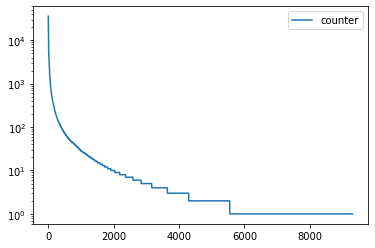

In [62]:
plt.figure(figsize = (30,30))
count_db.plot(logy=True)

In [70]:
count_db[90:100]

LEMMA  counter
90  מישהו      642
91    שנה      639
92     רק      639
93    איל      635
94    סדר      619
95     צד      618
96    עבר      611
97   נראה      595
98    בית      580
99  עניין      574

In [115]:
most_common_lemma=count_db['LEMMA'].tolist()
# most_common_lemma

In [116]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_common_lemma[:100],
    max_font_size=100)

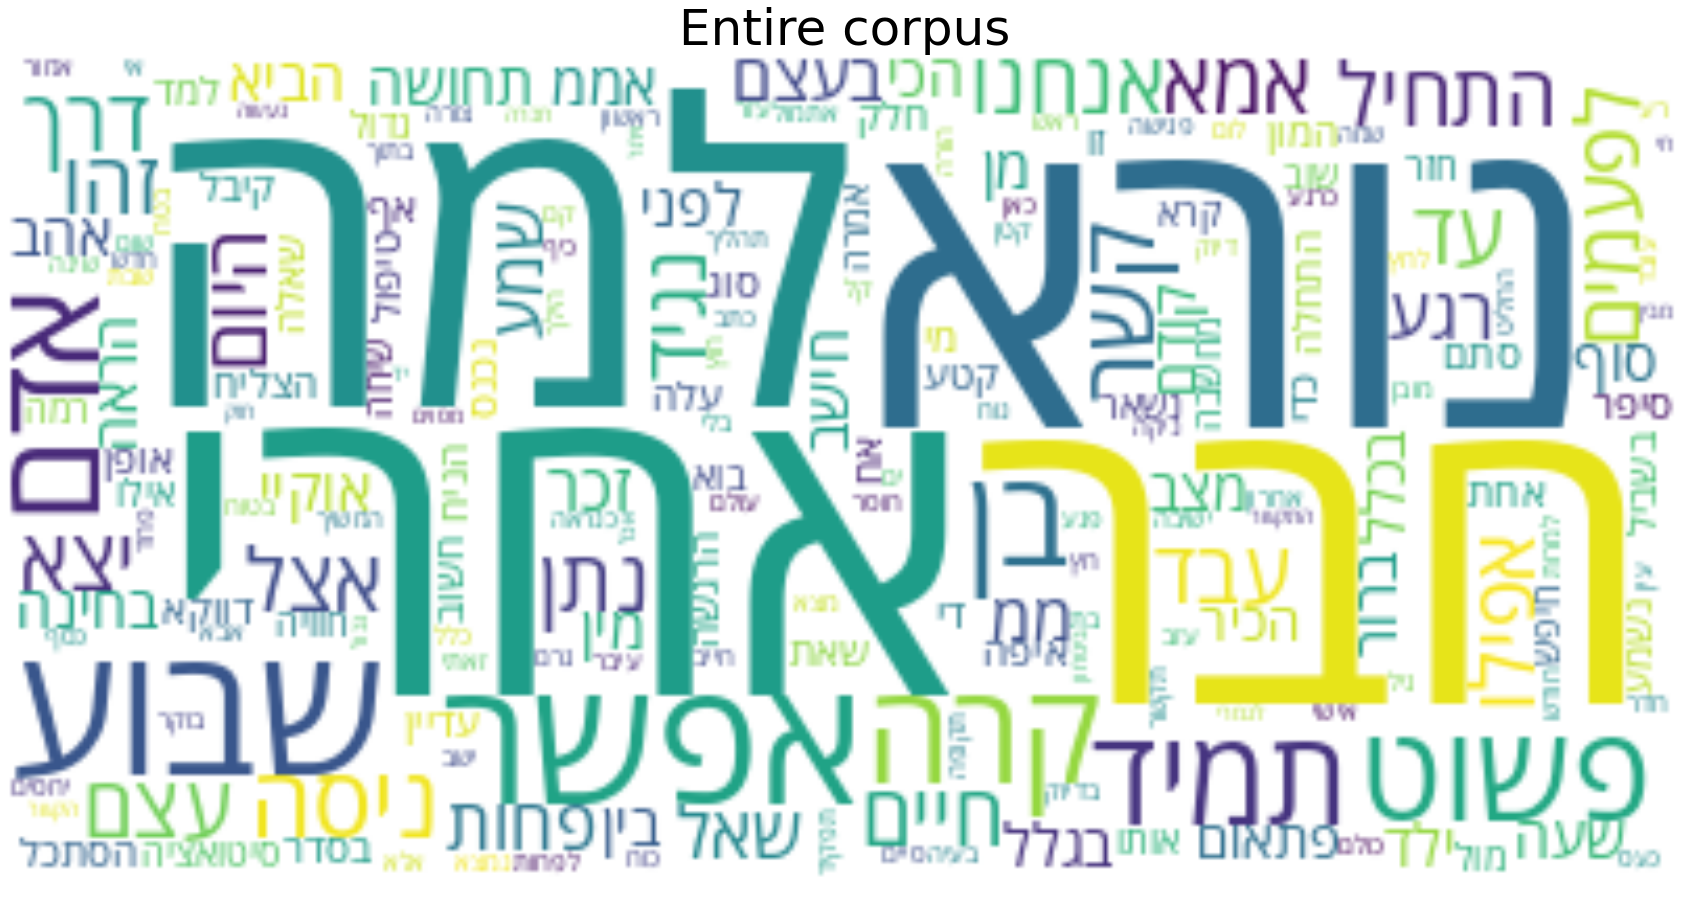

In [117]:
plt.figure(figsize = (30,30))
text = ' '.join(sent_lemma_db['LEMMA'])
word_cloud.generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

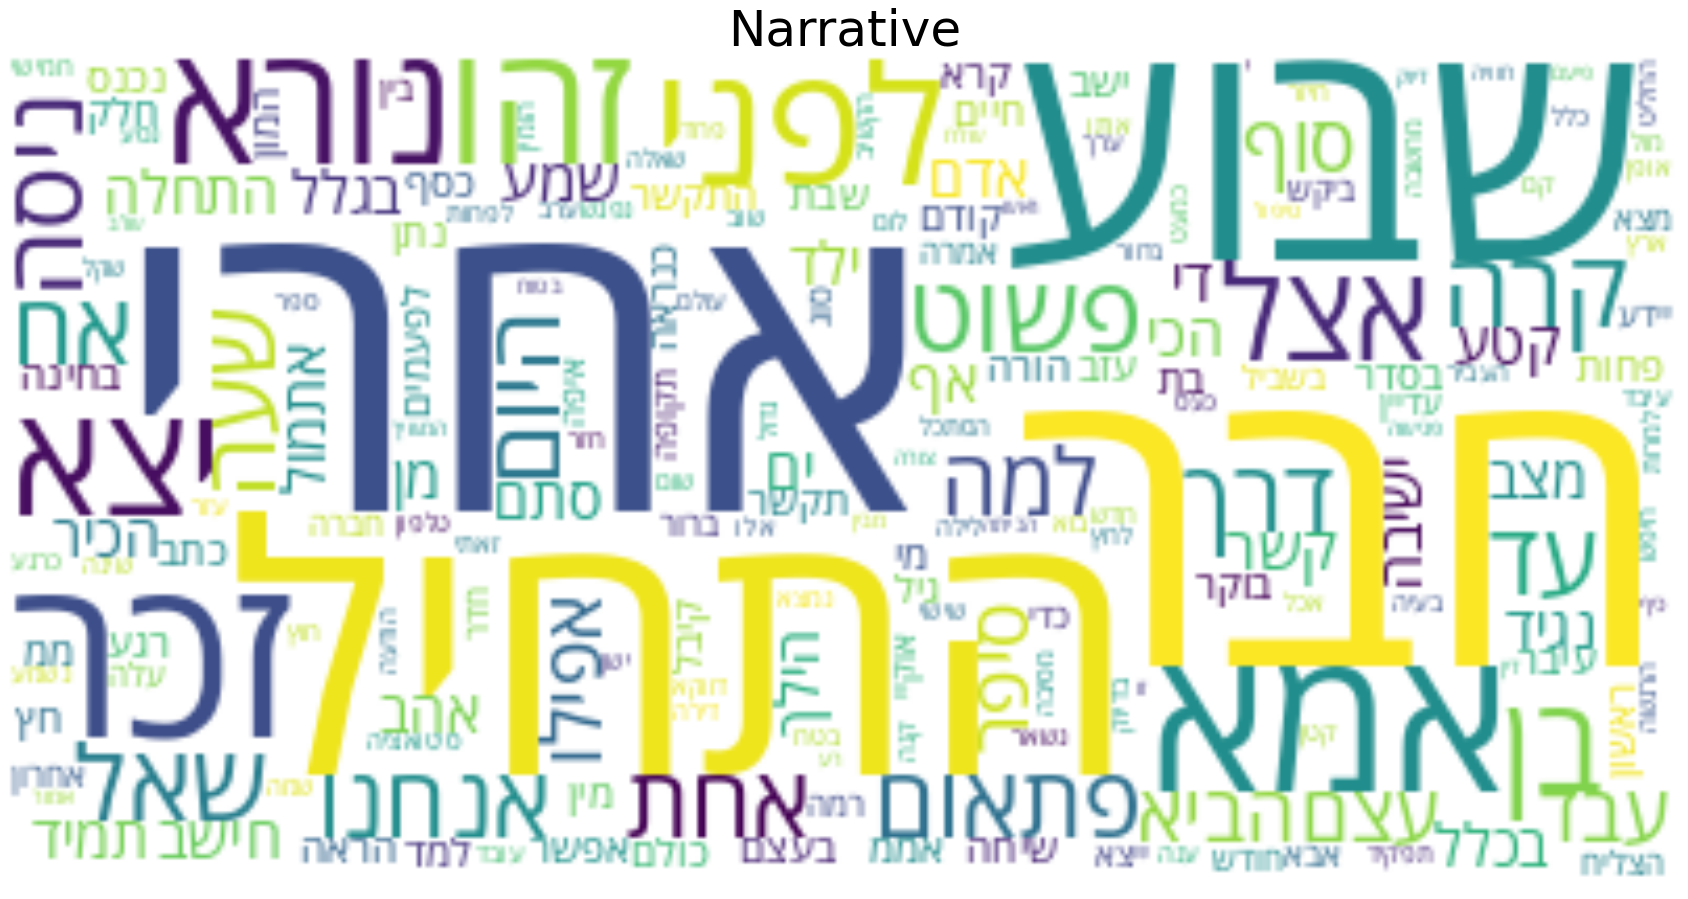

In [118]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 1")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

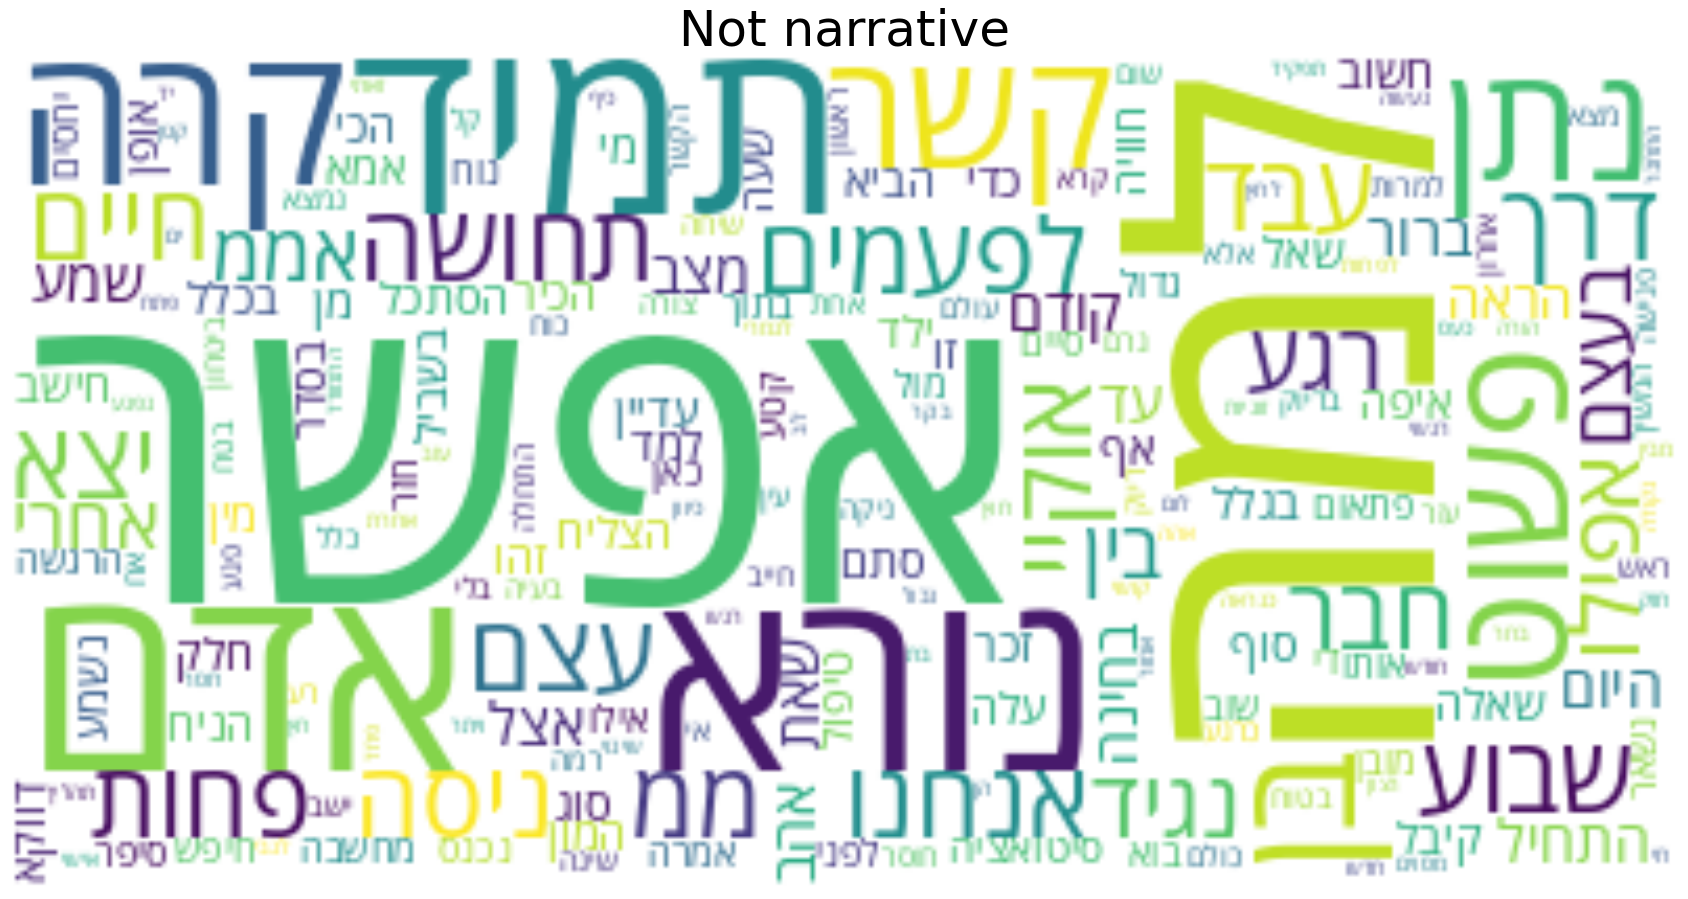

In [119]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 0")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

## Save stop_lemmas

In [120]:
dir_name

'clean_chars'

In [121]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_lemmas.json")
with open(json_path, 'w') as fp:
    json.dump(most_common_lemma,fp,ensure_ascii=False)

# Check most common WORDS

In [122]:
def get_words_from_db(db):
    return flatten(db['text'].str.split().tolist())

In [123]:
word_db=pd.DataFrame(get_words_from_db(sent_label_db),columns=['text'])
word_db

text
0           אז
1         היום
2        אנחנו
3       נפגשים
4           פה
...        ...
386864   לעצמך
386865     היה
386866      לי
386867    מאוד
386868     קשה

[386869 rows x 1 columns]

In [124]:
word_count_db= pd.DataFrame(word_db['text'].value_counts())
word_count_db.reset_index(inplace=True)
word_count_db

index   text
0           זה  14996
1           לא  13894
2          אני  11446
3           את   8513
4        כאילו   7823
...        ...    ...
24851  לסביבתו      1
24852     הקרו      1
24853  ולפתחאז      1
24854   ולשמוע      1
24855    מהרמת      1

[24856 rows x 2 columns]

In [125]:
word_count_db.rename({'text':'counter'},axis=1,inplace=True)
word_count_db.rename({'index':'word'},axis=1,inplace=True)

In [126]:
word_count_db

word  counter
0           זה    14996
1           לא    13894
2          אני    11446
3           את     8513
4        כאילו     7823
...        ...      ...
24851  לסביבתו        1
24852     הקרו        1
24853  ולפתחאז        1
24854   ולשמוע        1
24855    מהרמת        1

[24856 rows x 2 columns]

In [127]:
word_count_db[100:120]

word  counter
100      ב      590
101     רק      587
102   היום      579
103    ולא      572
104   פשוט      560
105   הזאת      559
106   האלה      557
107  להגיד      548
108  הייתה      545
109    וגם      531
110    דבר      529
111   נורא      528
112   נראה      520
113   רואה      516
114    לזה      515
115    אדם      489
116    בזה      479
117    שני      478
118    אחר      477
119     בא      475

In [128]:
most_comomn_words = word_count_db['word'].tolist()

In [105]:
# most_comomn_words

## Save stop_words

In [129]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_words.json")
with open(json_path, 'w') as fp:
    json.dump(most_comomn_words,fp,ensure_ascii=False)

In [130]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_comomn_words[:100],
    max_font_size=100)

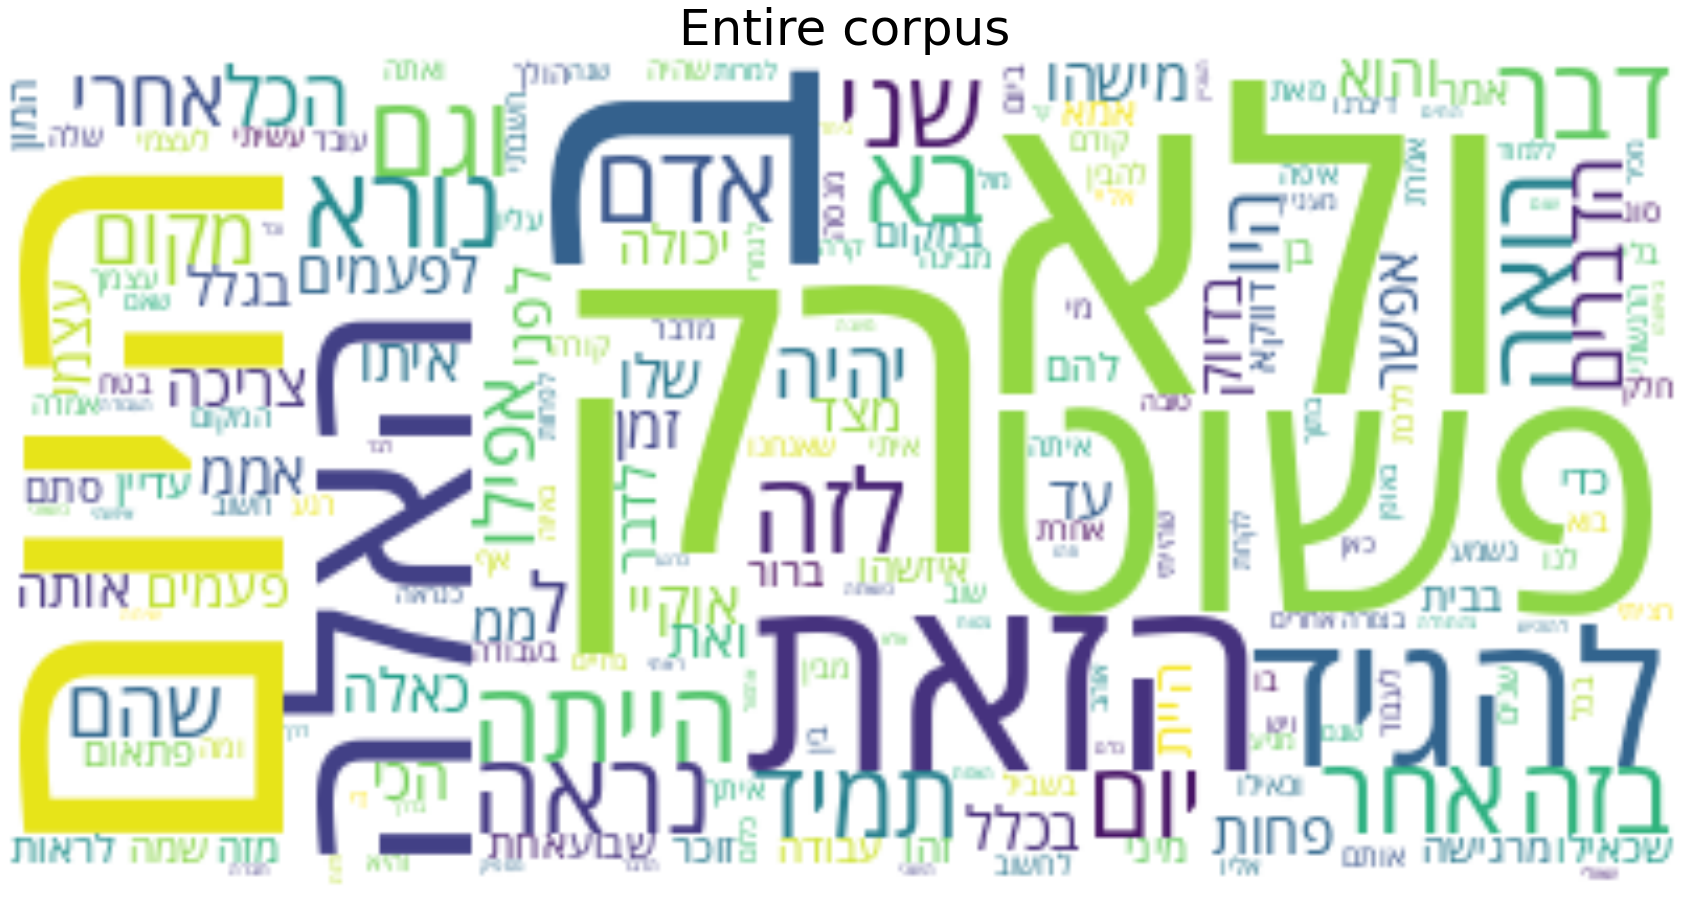

In [131]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

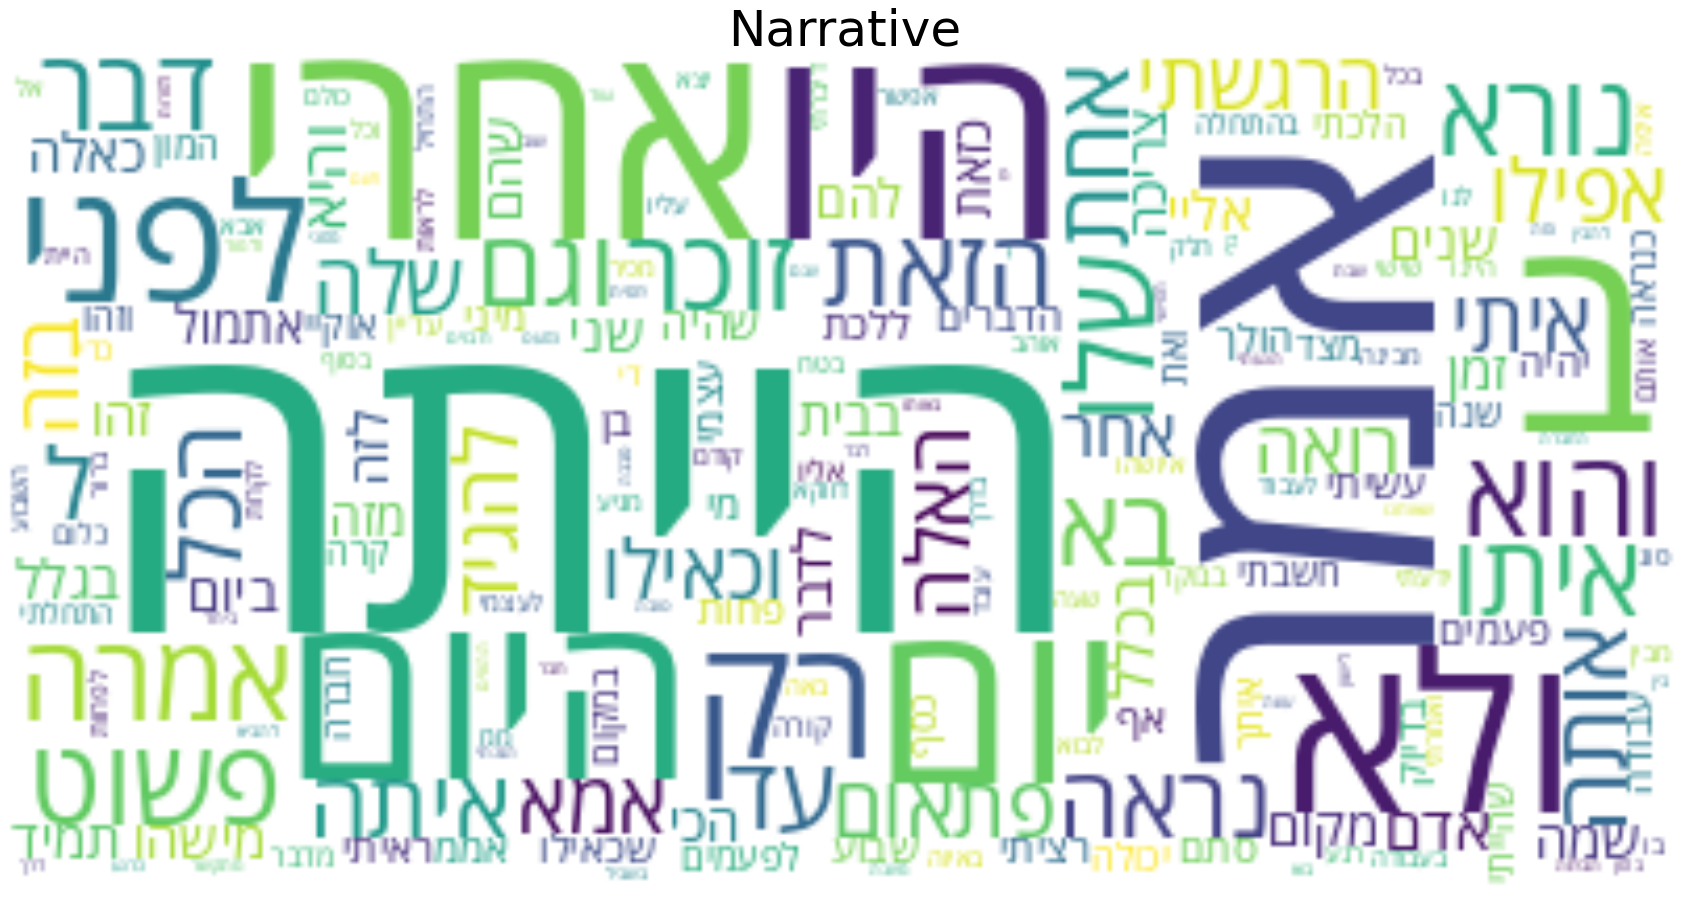

In [132]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db.query("is_nar == 1"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

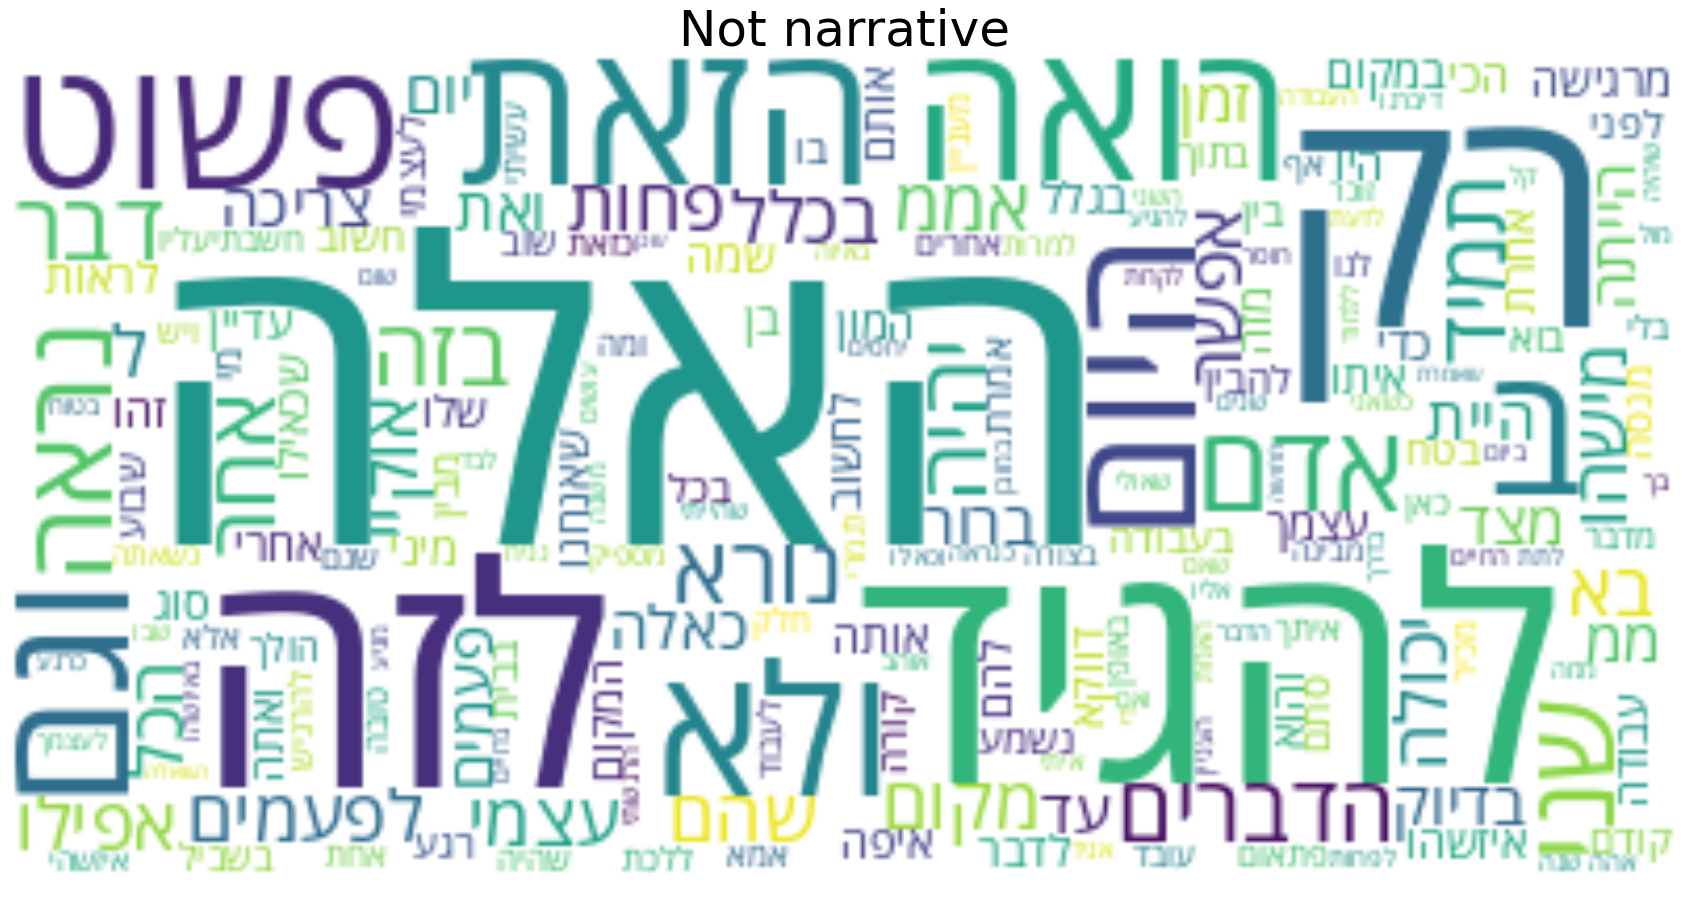

In [133]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db.query("is_nar == 0"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

In [3]:
merged_db = common_utils.concat_dbs(dir_name,"merged_db")
merged_db.head()

doc_idx  merged_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0        1           0     0.000000 0.000000        0.000000 47.000000   
1        1           1     0.000000 0.000000        1.000000  2.000000   
2        1           2     1.000000 0.000000        2.000000 15.000000   
3        1           3     0.000000 0.000000        3.000000  8.000000   
4        1           4     0.000000 0.000000        4.000000 19.000000   

   is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  ...  f_per_3  \
0          0                0         1.000000         0.001724  ... 0.000000   
1          1                0         1.000000         0.003448  ... 0.000000   
2          0                0         1.000000         0.005172  ... 0.000000   
3          1                0         1.000000         0.006897  ... 0.000000   
4          0                0         1.000000         0.008621  ... 0.000000   

   f_per_A  f_tense_BEINONI  f_tense_FUTURE  f_tense_IMPERATIVE  f_tense_PAST  \
0 0.100000         0.000000        0.000000            0.000000      0.000000   
1 0.000000         0.000000        0.000000            0.000000      0.000000   
2 0.000000         0.000000        0.000000            0.000000      0.000000   
3 0.000000         0.000000        0.000000            0.000000      0.000000   
4 0.000000         0.000000        0.000000            0.000000      0.000000   

   POSTAG_NEG  POSTAG_TTL  POSTAG_yyCM  POSTAG_NNPT  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN  

[5 rows x 68 columns]

<Figure size 1080x576 with 0 Axes>

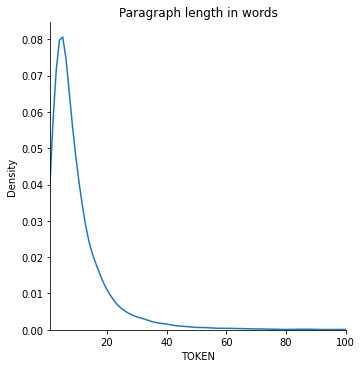

In [16]:
plt.figure(figsize = (15,8))
par_len_words = merged_db.groupby(['doc_idx','merged_idx','par_idx_in_doc'])
par_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            common_norm=False
                           )
par_len_sns.set(title="Paragraph length in words",xlim=((1,100)))

<Figure size 576x1080 with 0 Axes>

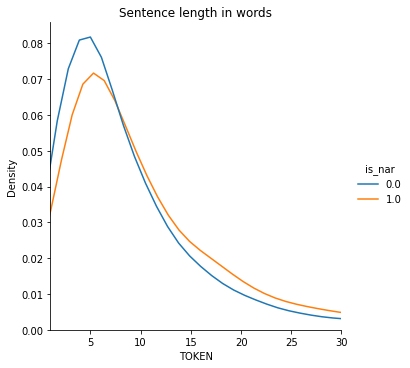

In [17]:
plt.figure(figsize = (8,15))
sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in words",xlim=((1,30)))

In [18]:
imp.reload(feature_utils)
sent_db = common_utils.concat_dbs(dir_name,"sent_db",defines.SENT_FEATURES)
sent_db

doc_idx  sent_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0            1         0     0.000000 0.000000        0.000000 47.000000   
1            1         1     0.000000 0.000000        1.000000  2.000000   
2            1         2     1.000000 0.000000        2.000000 15.000000   
3            1         3     0.000000 0.000000        3.000000  8.000000   
4            1         4     0.000000 0.000000        4.000000 19.000000   
...        ...       ...          ...      ...             ...       ...   
36319       80       486     0.000000 0.000000      222.000000 21.000000   
36320       80       487     0.000000 0.000000      222.000000 27.000000   
36321       80       488     0.000000 0.000000      222.000000 23.000000   
36322       80       489     1.000000 0.000000      223.000000 19.000000   
36323       80       490     0.000000 0.000000      224.000000 15.000000   

       is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0              0                0         1.000000         0.001724  
1              1                0         1.000000         0.003448  
2              0                0         1.000000         0.005172  
3              1                0         1.000000         0.006897  
4              0                0         1.000000         0.008621  
...          ...              ...              ...              ...  
36319          1                3         0.666667         0.991853  
36320          1                4         0.833333         0.993890  
36321          1                5         1.000000         0.995927  
36322          0                0         1.000000         0.997963  
36323          1                0         1.000000         1.000000  

[36324 rows x 10 columns]

In [19]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [20]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36324 entries, 0 to 36323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doc_idx          36324 non-null  int64  
 1   sent_idx         36324 non-null  int64  
 2   is_question      36324 non-null  float64
 3   is_nar           36324 non-null  float64
 4   par_idx_in_doc   36324 non-null  float64
 5   sent_len         36324 non-null  float64
 6   is_client        36324 non-null  int64  
 7   sent_idx_in_par  36324 non-null  int64  
 8   sent_pos_in_par  36324 non-null  float64
 9   sent_pos_in_doc  36324 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


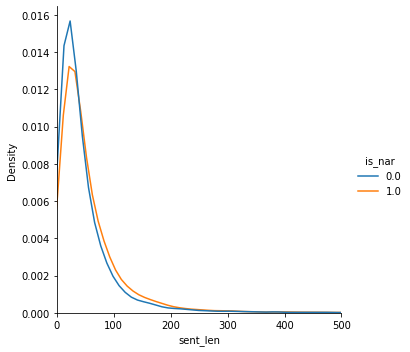

In [21]:
sent_len = sns.displot(data=sent_db,
                       x='sent_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
sent_len.set(xlim=(0, 500))

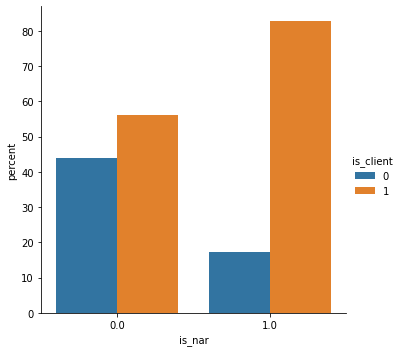

In [22]:
x,y = 'is_nar', 'is_client'

(sent_db
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [24]:
par_db = common_utils.concat_dbs(dir_name,"par_db",['par_len','par_type','is_nar'])
par_db

doc_idx  par_idx    par_len   par_type   is_nar
0            1        0  49.000000  therapist 0.000000
1            1        1   3.000000     client 0.000000
2            1        2  17.000000  therapist 0.000000
3            1        3  14.000000     client 0.000000
4            1        4  22.000000  therapist 0.000000
...        ...      ...        ...        ...      ...
15063       80      220 132.000000     client 0.000000
15064       80      221  97.000000  therapist 0.000000
15065       80      222 371.000000     client 0.000000
15066       80      223  20.000000  therapist 0.000000
15067       80      224  17.000000     client 0.000000

[15068 rows x 5 columns]

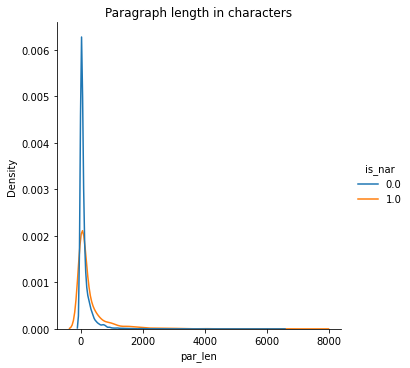

In [25]:
par_len_char = sns.displot(data=par_db,
                       x='par_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
par_len_char.set(title='Paragraph length in characters')

### Chek distrib of par len in sentences

In [26]:
sent_db

doc_idx  sent_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0            1         0     0.000000 0.000000        0.000000 47.000000   
1            1         1     0.000000 0.000000        1.000000  2.000000   
2            1         2     1.000000 0.000000        2.000000 15.000000   
3            1         3     0.000000 0.000000        3.000000  8.000000   
4            1         4     0.000000 0.000000        4.000000 19.000000   
...        ...       ...          ...      ...             ...       ...   
36319       80       486     0.000000 0.000000      222.000000 21.000000   
36320       80       487     0.000000 0.000000      222.000000 27.000000   
36321       80       488     0.000000 0.000000      222.000000 23.000000   
36322       80       489     1.000000 0.000000      223.000000 19.000000   
36323       80       490     0.000000 0.000000      224.000000 15.000000   

       is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0              0                0         1.000000         0.001724  
1              1                0         1.000000         0.003448  
2              0                0         1.000000         0.005172  
3              1                0         1.000000         0.006897  
4              0                0         1.000000         0.008621  
...          ...              ...              ...              ...  
36319          1                3         0.666667         0.991853  
36320          1                4         0.833333         0.993890  
36321          1                5         1.000000         0.995927  
36322          0                0         1.000000         0.997963  
36323          1                0         1.000000         1.000000  

[36324 rows x 10 columns]

In [28]:
par_len_count = sent_db.groupby(['doc_idx','par_idx_in_doc'])['sent_idx'].count()
par_len_count

doc_idx  par_idx_in_doc
1        0.000000          1
         1.000000          1
         2.000000          1
         3.000000          1
         4.000000          1
                          ..
80       220.000000        3
         221.000000        2
         222.000000        6
         223.000000        1
         224.000000        1
Name: sent_idx, Length: 14918, dtype: int64

In [29]:
par_len_count.describe()

count   14918.000000
mean        2.434911
std         3.717304
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       111.000000
Name: sent_idx, dtype: float64

In [30]:
# find par with max length
par_len_count.idxmax(),par_len_count.max()

((5, 19.0), 111)

In [31]:
par_len_count.reset_index(drop=True).median()

1.0

In [32]:
par_len_count.quantile(q=0.95)

8.0

In [33]:
par_len_count.quantile(q=0.5)

1.0

In [34]:
par_len_count.quantile(q=0.75)

2.0

<Figure size 1080x576 with 0 Axes>

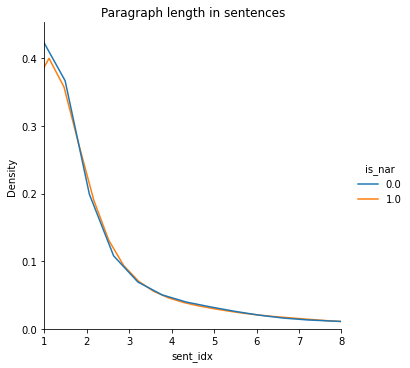

In [35]:
plt.figure(figsize = (15,8))
par_len_sent =  sns.displot(data=sent_db,x=par_len_count.reset_index(drop=True),
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
par_len_sent.set(title="Paragraph length in sentences",xlim=((1,8)))

[Text(0.5, 1.0, 'Paragraph length in sentences')]

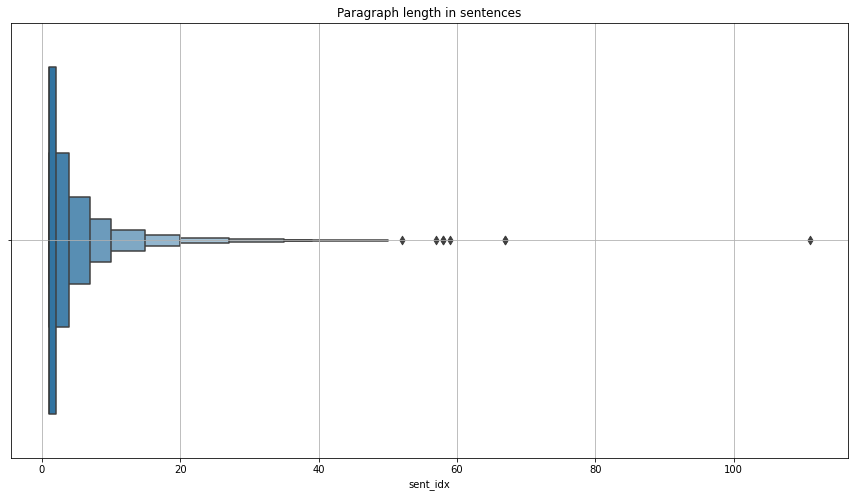

In [36]:
plt.figure(figsize = (15,8))
par_len_sent_b = sns.boxenplot(data=sent_db,
                               x=par_len_count.reset_index(drop=True),
                               hue='is_nar')
par_len_sent_b.grid()
par_len_sent_b.set(title="Paragraph length in sentences")

## Build word cloud